In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('~/src/Project_3_RAW_DATA/201812-citibike-tripdata.csv')
df.head()

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,False,False,689,00:04.3,11:33.8,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,E 47 St & 2 Ave,40.753231,-73.970325,35033,Subscriber,1989,1
1,False,False,204,00:05.5,03:30.5,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,E 116 St & 2 Ave,40.796879,-73.937261,20501,Subscriber,1966,1
2,False,False,316,00:10.2,05:27.2,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,18386,Subscriber,1984,1
3,False,False,499,24:33.5,32:52.7,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,21037,Subscriber,1960,1
4,False,False,334,24:31.1,30:05.5,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3157.0,East End Ave & E 86 St,40.775186,-73.944461,19467,Subscriber,1992,1


In [12]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611103 entries, 0 to 611102
Data columns (total 19 columns):
over 30                    611103 non-null bool
over 45                    611103 non-null bool
tripduration               611103 non-null int64
starttime                  611103 non-null object
stoptime                   611103 non-null object
start station id           611069 non-null float64
start station name         611069 non-null object
start station latitude     611103 non-null float64
start station longitude    611103 non-null float64
end station id             611069 non-null float64
end station name           611069 non-null object
end station latitude       611103 non-null float64
end station longitude      611103 non-null float64
bikeid                     611103 non-null int64
usertype                   611103 non-null object
birth year                 611103 non-null int64
gender                     611103 non-null int64
over_time                  611103 non-nul

In [20]:
df['tripduration_min'] = df['tripduration'] / 60
df.head()

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,over_time,tripduration_min
0,False,False,689,00:04.3,11:33.8,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,E 47 St & 2 Ave,40.753231,-73.970325,35033,Subscriber,1989,1,False,11.483333
1,False,False,204,00:05.5,03:30.5,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,E 116 St & 2 Ave,40.796879,-73.937261,20501,Subscriber,1966,1,False,3.400000
2,False,False,316,00:10.2,05:27.2,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,18386,Subscriber,1984,1,False,5.266667
3,False,False,499,24:33.5,32:52.7,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,21037,Subscriber,1960,1,False,8.316667
4,False,False,334,24:31.1,30:05.5,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3157.0,East End Ave & E 86 St,40.775186,-73.944461,19467,Subscriber,1992,1,False,5.566667


here I am creating my target variable

In [21]:
df['over_time'] = (((df['usertype'] == 'Subscriber') & (df['over 45'] == True)) | ((df['usertype'] == 'Customer') & (df['over 30'] == True)))

df.head()

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,over_time,tripduration_min
0,False,False,689,00:04.3,11:33.8,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,E 47 St & 2 Ave,40.753231,-73.970325,35033,Subscriber,1989,1,False,11.483333
1,False,False,204,00:05.5,03:30.5,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,E 116 St & 2 Ave,40.796879,-73.937261,20501,Subscriber,1966,1,False,3.400000
2,False,False,316,00:10.2,05:27.2,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,18386,Subscriber,1984,1,False,5.266667
3,False,False,499,24:33.5,32:52.7,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,21037,Subscriber,1960,1,False,8.316667
4,False,False,334,24:31.1,30:05.5,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3157.0,East End Ave & E 86 St,40.775186,-73.944461,19467,Subscriber,1992,1,False,5.566667


below I am just checking to make sure overtime is working, seems to be

In [22]:
df_overtime = (df[df.over_time == True])

In [23]:
df_overtime.sample(10)

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,over_time,tripduration_min
157013,True,True,2813,12:56.2,59:50.1,304.0,Broadway & Battery Pl,40.704633,-74.013617,3259.0,9 Ave & W 28 St,40.749370,-73.999234,21486,Customer,1969,0,True,46.883333
190991,True,True,4172,10:50.4,20:22.7,498.0,Broadway & W 32 St,40.748549,-73.988084,498.0,Broadway & W 32 St,40.748549,-73.988084,17118,Customer,1969,0,True,69.533333
220530,True,True,98196,56:29.8,13:06.0,3167.0,Amsterdam Ave & W 73 St,40.779668,-73.980930,490.0,8 Ave & W 33 St,40.751551,-73.993934,28660,Customer,1990,2,True,1636.600000
195477,True,False,2307,59:19.1,37:46.8,3137.0,5 Ave & E 73 St,40.772828,-73.966853,3160.0,Central Park West & W 76 St,40.778968,-73.973747,34733,Customer,1991,2,True,38.450000
58919,True,False,1969,23:38.9,56:28.8,3137.0,5 Ave & E 73 St,40.772828,-73.966853,468.0,Broadway & W 56 St,40.765265,-73.981923,26008,Customer,1969,0,True,32.816667
172318,True,True,6295,00:47.8,45:43.6,3163.0,Central Park West & W 68 St,40.773407,-73.977825,3282.0,5 Ave & E 88 St,40.783070,-73.959390,15769,Customer,1968,1,True,104.916667
33107,True,False,1835,46:09.5,16:45.0,3398.0,Smith St & 9 St,40.674696,-73.997858,3477.0,39 St & 2 Ave - Citi Bike HQ at Industry City,40.655400,-74.010628,27027,Customer,1997,1,True,30.583333
182366,True,True,3355,43:09.4,39:04.8,3658.0,W 18 St & 9 Ave,40.743534,-74.003676,450.0,W 49 St & 8 Ave,40.762272,-73.987882,27225,Subscriber,1993,2,True,55.916667
9882,True,True,4298,26:32.3,38:11.3,525.0,W 34 St & 11 Ave,40.755942,-74.002116,3430.0,Richardson St & N Henry St,40.719079,-73.942237,33889,Subscriber,1992,1,True,71.633333
339184,True,True,3582,03:34.8,03:16.8,3718.0,E 11 St & Avenue B,40.727464,-73.979504,3718.0,E 11 St & Avenue B,40.727464,-73.979504,27631,Subscriber,1995,1,True,59.700000


In [28]:
df['year'] = 2018

In [30]:
df.head()

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,over_time,tripduration_min,year
0,False,False,689,00:04.3,11:33.8,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,E 47 St & 2 Ave,40.753231,-73.970325,35033,Subscriber,1989,1,False,11.483333,2018
1,False,False,204,00:05.5,03:30.5,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,E 116 St & 2 Ave,40.796879,-73.937261,20501,Subscriber,1966,1,False,3.400000,2018
2,False,False,316,00:10.2,05:27.2,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,18386,Subscriber,1984,1,False,5.266667,2018
3,False,False,499,24:33.5,32:52.7,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,21037,Subscriber,1960,1,False,8.316667,2018
4,False,False,334,24:31.1,30:05.5,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3157.0,East End Ave & E 86 St,40.775186,-73.944461,19467,Subscriber,1992,1,False,5.566667,2018


In [31]:
df['age'] = df['year'] - df['birth year']
df.head()

,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,end station latitude,end station longitude,bikeid,usertype,birth year,gender,over_time,tripduration_min,year,age
0,False,False,689,00:04.3,11:33.8,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,...,40.753231,-73.970325,35033,Subscriber,1989,1,False,11.483333,2018,29
1,False,False,204,00:05.5,03:30.5,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,...,40.796879,-73.937261,20501,Subscriber,1966,1,False,3.400000,2018,52
2,False,False,316,00:10.2,05:27.2,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,...,40.688226,-73.979382,18386,Subscriber,1984,1,False,5.266667,2018,34
3,False,False,499,24:33.5,32:52.7,3117.0,Franklin St & Dupont St,40.735640,-73.958660,3016.0,...,40.720368,-73.961651,21037,Subscriber,1960,1,False,8.316667,2018,58
4,False,False,334,24:31.1,30:05.5,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3157.0,...,40.775186,-73.944461,19467,Subscriber,1992,1,False,5.566667,2018,26


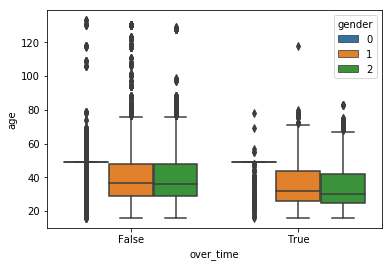

In [35]:
sns.boxplot('over_time', 'age', hue='gender', data=df)

In [46]:
df_gb = df.groupby(['over_time'])[['gender']].sum()
df_gb

,gender
over_time,
False,701376
True,11246


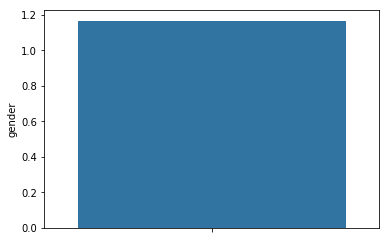

In [50]:
sns.barplot(y = df['gender'])

In [60]:
gender_counts_over_time=df.groupby('gender')[['over_time']].sum().reset_index()
gender_counts_over_time

,gender,over_time
0,0,5150.0
1,1,5900.0
2,2,2673.0


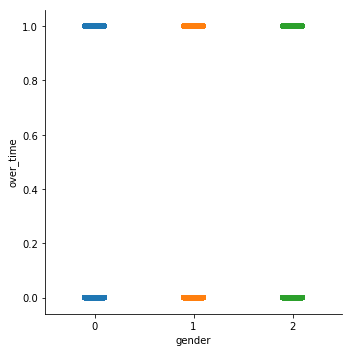

In [64]:
sns.catplot('gender', 'over_time', data=df);

In [59]:
gender_counts=df.groupby('gender').count().reset_index()
gender_counts


,gender,over 30,over 45,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,...,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,over_time,tripduration_min,year,age
0,0,30310,30310,30310,30310,30310,30310,30310,30310,30310,...,30310,30310,30310,30310,30310,30310,30310,30310,30310,30310
1,1,448964,448964,448964,448964,448964,448951,448951,448964,448964,...,448951,448964,448964,448964,448964,448964,448964,448964,448964,448964
2,2,131829,131829,131829,131829,131829,131808,131808,131829,131829,...,131808,131829,131829,131829,131829,131829,131829,131829,131829,131829


In [70]:
df_gender_by_usertype = df.groupby('gender')[['over_time']].count().reset_index()
df_gender_by_usertype

,gender,over_time
0,0,30310
1,1,448964
2,2,131829


TypeError: 'NoneType' object is not iterable

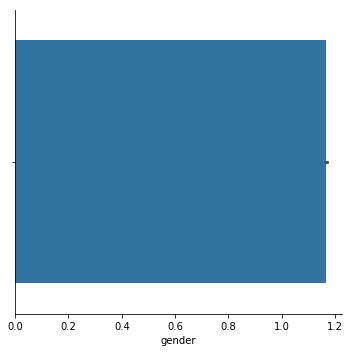

In [73]:
sns.catplot(x="gender", hue='over_time', kind="bar", data=df);


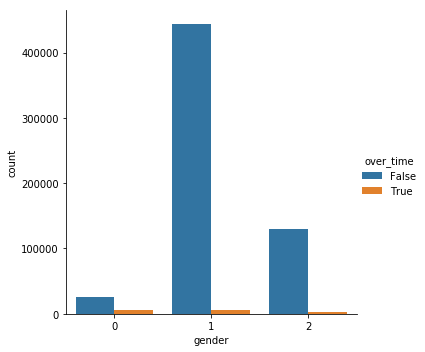

In [74]:
sns.catplot(x="gender", hue='over_time', kind="count", data=df);
